In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import folium
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point
import plotly.express as px

In [2]:
df = pd.read_csv('data/dataset.csv')
df

C:\Users\Olena\AppData\Local\Temp\ipykernel_26840\1784490041.py:1: DtypeWarning: Columns (9,12,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/dataset.csv')


,Unnamed: 0,SessionID,Start,End,kWh,Revenue,City,PortNum,PortType,Adapter,Client,Tariff,MaxPower,Fishka,Successful,DisconnectionReason,Latitude,Longitude,Type
0,0,591686,2021-01-01 00:05:34,2021-01-01 00:31:22,6.033,27.15,Київ,3,Type 2 Plug,False,553804960,4.50,NaN,True,True,NaN,50.43104,30.39037,FAST
1,1,591720,2021-01-01 01:40:37,2021-01-01 01:42:19,0.890,6.22,Київ,1,CHAdeMO,False,550843379,6.99,NaN,True,True,NaN,50.48207,30.48725,FAST
2,2,591749,2021-01-01 02:12:35,2021-01-01 03:07:36,3.300,14.85,Стрый,1,Type 2,False,540085134,4.50,NaN,True,True,NaN,49.24778,23.85610,SLOW
3,3,591755,2021-01-01 02:32:21,2021-01-01 02:57:08,6.880,48.09,Київ,1,CHAdeMO,False,828881697,6.99,NaN,True,True,NaN,50.48207,30.48725,FAST
4,4,591783,2021-01-01 03:39:03,2021-01-01 04:02:05,12.630,56.84,Київ,3,Type 2 Plug,False,553804960,4.50,NaN,True,True,NaN,50.43104,30.39037,FAST
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372182,372182,2486542,2024-10-31 23:27:29,2024-10-31 23:35:31,1.400,22.39,Київ,2,CHAdeMO,NaN,823585024,15.99,16.0,NaN,True,Дистанційна зупинка,50.46754,30.35680,FAST
372183,372183,2486548,2024-10-31 23:39:18,2024-11-01 00:06:30,44.931,763.38,Біла Криниця,1,CCS 2,NaN,544295795,16.99,119.0,NaN,True,NaN,50.60912,26.37798,ULTRAFAST
372184,372184,2486554,2024-10-31 23:50:28,2024-10-31 23:57:16,13.338,226.61,Нерубайське,1,CCS 2,NaN,603258103,16.99,148.0,NaN,True,Недостатньо коштів,46.53692,30.65360,ULTRAFAST
372185,372185,2486555,2024-10-31 23:50:34,2024-11-01 00:16:22,13.718,233.07,Солонка,1,CCS 2,NaN,535769215,16.99,38.0,NaN,True,Недостатньо коштів,49.75055,24.01561,ULTRAFAST


In [5]:
df['Start'] = pd.to_datetime(df['Start'])
df['End'] = pd.to_datetime(df['End'])

# Calculate the difference
df['ChargingTime'] = round((df['End'] - df['Start']).dt.total_seconds() / 60, 2)

df.head()

,Unnamed: 0,SessionID,Start,End,kWh,Revenue,City,PortNum,PortType,Adapter,Client,Tariff,MaxPower,Fishka,Successful,DisconnectionReason,Latitude,Longitude,Type,ChargingTime
0,0,591686,2021-01-01 00:05:34,2021-01-01 00:31:22,6.033,27.15,Київ,3,Type 2 Plug,False,553804960,4.50,NaN,True,True,NaN,50.43104,30.39037,FAST,25.80
1,1,591720,2021-01-01 01:40:37,2021-01-01 01:42:19,0.890,6.22,Київ,1,CHAdeMO,False,550843379,6.99,NaN,True,True,NaN,50.48207,30.48725,FAST,1.70
2,2,591749,2021-01-01 02:12:35,2021-01-01 03:07:36,3.300,14.85,Стрый,1,Type 2,False,540085134,4.50,NaN,True,True,NaN,49.24778,23.85610,SLOW,55.02
3,3,591755,2021-01-01 02:32:21,2021-01-01 02:57:08,6.880,48.09,Київ,1,CHAdeMO,False,828881697,6.99,NaN,True,True,NaN,50.48207,30.48725,FAST,24.78
4,4,591783,2021-01-01 03:39:03,2021-01-01 04:02:05,12.630,56.84,Київ,3,Type 2 Plug,False,553804960,4.50,NaN,True,True,NaN,50.43104,30.39037,FAST,23.03


In [ ]:
df.to_csv('dataset.csv', index=False)

In [15]:
locations = pd.read_csv('data/locations.csv')
locations.head()

,Unnamed: 0,Унікод АЗС,Address,Number,Region,Latitude,Longitude
0,0,28410100.0,"м. Київ, просп. Леся Курбаса, 2 Ж",АЗС-47,м. Київ,50.43104,30.39037
1,1,25840200.0,"м. Київ, вул. Новокостянтинівська, 4 Ж",АЗС-62,м. Київ,50.48207,30.48725
2,2,40112300.0,"м. Стрий, вул. Болехівська, 49",АЗС-23,Львів,49.24778,23.85610
3,3,40512100.0,"Надвірнянський р-н, м. Надвірна, вул. Вокзальн...",АЗС-21,Івано-Франківськ,48.62307,24.58351
4,4,60961300.0,"м. Київ, просп. Академіка Палладіна, 33",АЗС-63,м. Київ,50.46754,30.35680


In [ ]:
def create_static_ukraine_map(locations_df, figsize=(15, 10), title="Розташування заправок"):
    geometry = [Point(xy) for xy in zip(locations_df['Longitude'], locations_df['Latitude'])]
    gdf = gpd.GeoDataFrame(locations_df, geometry=geometry, crs="EPSG:4326")
     
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    ukraine = world[world.name == 'Ukraine']
    
    fig, ax = plt.subplots(figsize=figsize)
    
    ukraine = ukraine.to_crs(epsg=3857)
    gdf = gdf.to_crs(epsg=3857)
    
    ukraine.plot(ax=ax, alpha=0.3, color='lightgray', edgecolor='black')
    
    ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
    
    gdf.plot(ax=ax, color='#92D050', markersize=80, alpha=1)
    plt.title(title, fontsize=16, pad=20)
    ax.set_axis_off()
    ax.set_aspect('equal')
    plt.tight_layout()
    
    return fig

C:\Users\Olena\AppData\Local\Temp\ipykernel_26840\4058341089.py:18: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



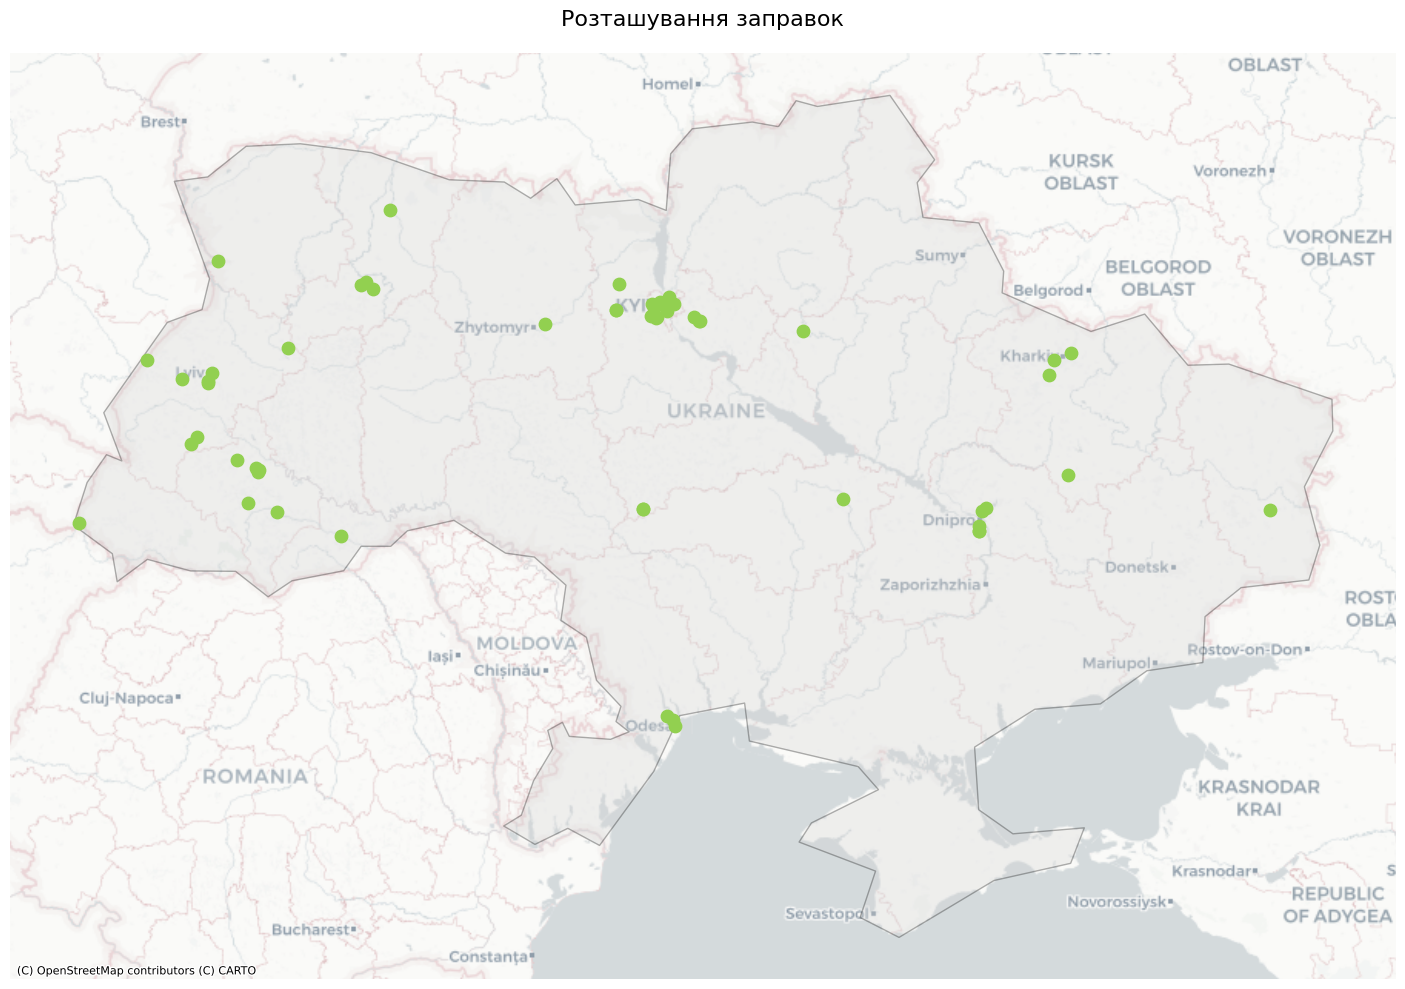

In [39]:
fig = create_static_ukraine_map(locations)
plt.show()